In [72]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

TEST_SPLIT_SIZE = .3
RANDOM_STATE = 2055  # Parties in the sky

In [73]:
tf.keras.utils.set_random_seed(RANDOM_STATE)

In [74]:
def get_data(encode_y=False):
    vehicle_data = np.genfromtxt("./datos.csv", delimiter=",")

    x = vehicle_data[:, 0:-1]

    y = vehicle_data[:, -1]
    y = y.astype(np.uint8)
    y = y - 1  # Map target values from 0-4 instead of 1-5. Not really needed but really convenient for the dispersion matrix

    if encode_y:
        label_binarizer = LabelBinarizer()
        label_binarizer.fit(range(max(y) + 1))
        y = label_binarizer.transform(y)

    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=RANDOM_STATE, shuffle=False,
                                                        test_size=TEST_SPLIT_SIZE)

    return x_train, x_test, y_train, y_test

In [75]:
def get_model():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=4))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    return model


In [76]:
def plot_losses(history, title):
    last_epoch_loss = history.history['loss'][-1]
    last_epoch_val_loss = history.history['val_loss'][-1]

    figure = plt.figure(figsize=(10, 8))

    axes = figure.add_subplot(1, 1, 1)

    axes.plot(history.history['loss'], color="#003B80", linestyle="dotted",
              label=f"loss entrenamiento {last_epoch_loss:.2f}")
    axes.plot(history.history['val_loss'], color="#003B80", label=f"loss validación {last_epoch_val_loss:.2f}")

    axes.set_xlabel('Época', color="#003B80", fontsize=14)
    axes.set_ylabel('Pérdidas', color="#003B80", fontsize=14)

    axes.set_title(title, fontsize=18)
    axes.set_facecolor('#F0F7FF')
    axes.legend(loc="best")
    axes.grid(visible=True, which='major', axis='both', color="#FFFFFF", linewidth=2)
    axes.set_axisbelow(True)

    return figure


# Training with categorical crossentropy

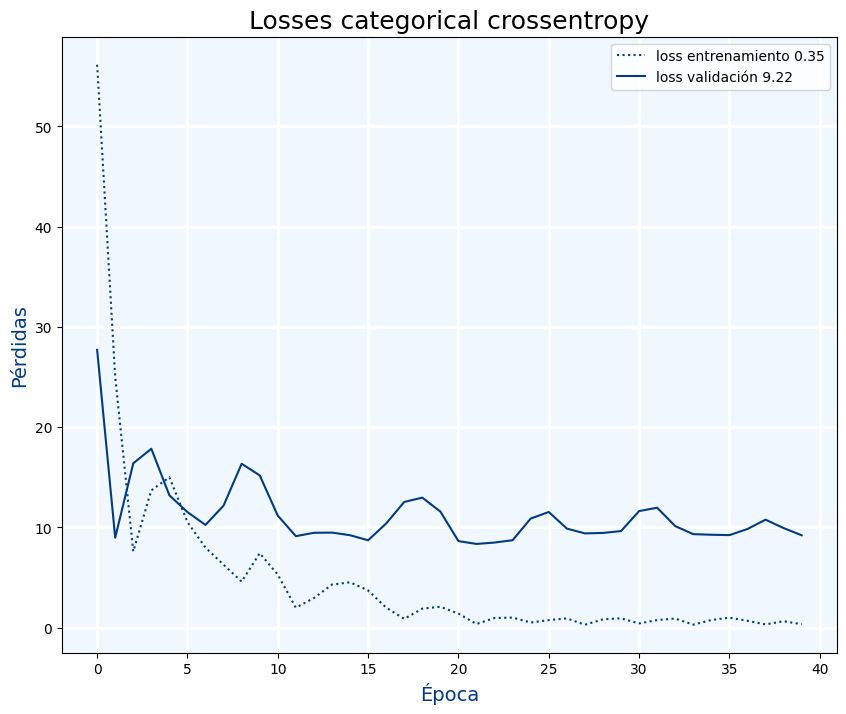

In [77]:
X_train_cce, X_test_cce, y_train_cce, y_test_cce = get_data(encode_y=True)
model_cce = get_model()
model_cce.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_cce = model_cce.fit(X_train_cce, y_train_cce, epochs=40, batch_size=32,
                            validation_data=(X_test_cce, y_test_cce), shuffle=False, verbose=False)
_ = plot_losses(history_cce, "Losses categorical crossentropy")

# Training with sparse categorical crossentropy

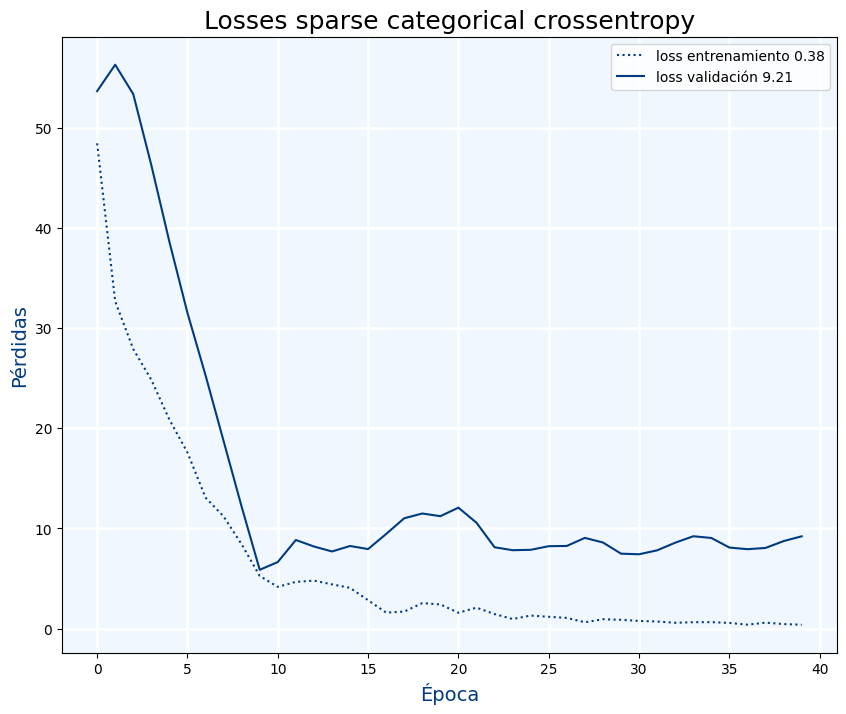

In [78]:
X_train_scce, X_test_scce, y_train_scce, y_test_scce = get_data()
model_scce = get_model()
model_scce.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_scce = model_scce.fit(X_train_scce, y_train_scce, epochs=40, batch_size=32,
                              validation_data=(X_test_scce, y_test_scce), shuffle=False, verbose=False)
_ = plot_losses(history_scce, "Losses sparse categorical crossentropy")